In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
bank_df = pd.read_csv('bank_marketing_train.csv')

In [77]:
pd.set_option('display.max_columns', 100)

## 前処理

In [78]:
#不必要変数を除外
bank_df2 = bank_df.drop(['duration','campaign', 'pdays', 'previous'],axis=1)

In [79]:
#ダミー変数に変換
categorical_variable_names = ['job', 'marital', 'education','poutcome','month','day_of_week',
                               'default', 'housing', 'loan', 'contact', 'y']
x_dummys = pd.get_dummies(bank_df2[categorical_variable_names])
bank_df2.drop(categorical_variable_names, axis=1, inplace=True)

In [80]:
#他変数の正規化
bank_df2_std = StandardScaler().fit_transform(bank_df2)
bank_df2_std = pd.DataFrame(bank_df2_std, columns = bank_df2.columns)

In [81]:
#データ整形
bank_df2 = pd.concat([bank_df2_std, x_dummys], axis=1)

In [82]:
#多重共線性排除
bank_df2 = bank_df2.drop(['default_no','default_unknown','loan_no','loan_unknown',
                          'education_unknown','poutcome_failure','poutcome_nonexistent',
                          'poutcome_failure','marital_unknown','housing_no','housing_unknown','y_no'],axis=1)

In [83]:
bank_df2.keys()

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'poutcome_success', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'y_yes'],
      dtype='obj

## train/test データ分割


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = bank_df2.drop(['y_yes'], axis=1)
y = bank_df2['y_yes']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

## xgboost

In [87]:
import xgboost as xgb

In [88]:
#モデルの生成
clf = xgb.XGBClassifier()
#学習
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## グリッドサーチ

In [20]:
from sklearn.grid_search import GridSearchCV
params = {'max_depth': [1, 3, 5], 'learning_rate': [0.05, 0.1], 'subsample': [0.8, 0.9, 1],
          'colsample_bytree': [0.5, 1.0]}

C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
gscv = GridSearchCV(clf, param_grid=params, cv=3, verbose=1)

In [22]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5], 'learning_rate': [0.05, 0.1], 'subsample': [0.8, 0.9, 1], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [89]:
gscv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'subsample': 0.8}

## パラメータ調整後モデル

In [90]:
clf = xgb.XGBClassifier(**gscv.best_params_)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

## モデルの精度評価

In [91]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [111]:
#クロスバリデーション（汎化性能チェック）
scores = cross_val_score(clf,X_test,y_test)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Cross-Validation scores: [0.9285329  0.9279741  0.92552617]
Average score: 0.927344392884807


C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### （テストデータ適用）

In [114]:
#テストデータ適用
bank_test = pd.read_csv('bank_marketing_train.csv')
bank_test2 = bank_df.drop(['duration','campaign', 'pdays', 'previous'],axis=1)

#ダミー変数に変換
categorical_variable_names = ['job', 'marital', 'education','poutcome','month','day_of_week',
                               'default', 'housing', 'loan', 'contact', 'y']
x_dummys = pd.get_dummies(bank_test2[categorical_variable_names])
bank_test2.drop(categorical_variable_names, axis=1, inplace=True)

#他変数の正規化
bank_test2_std = StandardScaler().fit_transform(bank_test2)
bank_test2_std = pd.DataFrame(bank_test2_std, columns = bank_test2.columns)

#データ整形
bank_test2 = pd.concat([bank_test2_std, x_dummys], axis=1)

#多重共線性排除
bank_test2 = bank_test2.drop(['default_no','default_unknown','loan_no','loan_unknown',
                          'education_unknown','poutcome_failure','poutcome_nonexistent',
                          'poutcome_failure','marital_unknown','housing_no','housing_unknown','y_no'],axis=1)

In [93]:
#y_pred = (clf.predict_proba(bank_test2)[:, 1] > 0.2).astype(int)
y_pred = (clf.predict_proba(X_test)[:, 1] > 0.2).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
#正確度
accuracy_score(y_test, y_pred)

0.9144861073644457

In [95]:
#適合率
precision_score(y_test, y_pred)

0.3873015873015873

In [96]:
#再現率
recall_score(y_test, y_pred)

0.3016069221260816

In [97]:
#F値
f1_score(y_test, y_pred)

0.3391243919388464

In [98]:
#AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
auc(fpr, tpr)

0.7075863467718193

In [109]:
#confusionmatrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
pred = clf.predict(X_test)
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[9926  386]
 [ 565  244]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.95     10312
          1       0.39      0.30      0.34       809

avg / total       0.91      0.91      0.91     11121



C:\Users\bowwo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## ROIを計算  
###  ROI = sales - cost  
###   =(成約数×2000円) - (架電数×500円)

In [101]:
roi = (conf_mat[1][1] * 2000) - ((conf_mat[0][1] + conf_mat[1][1]) * 500)
roi

173000

## 参考)特徴量重要度

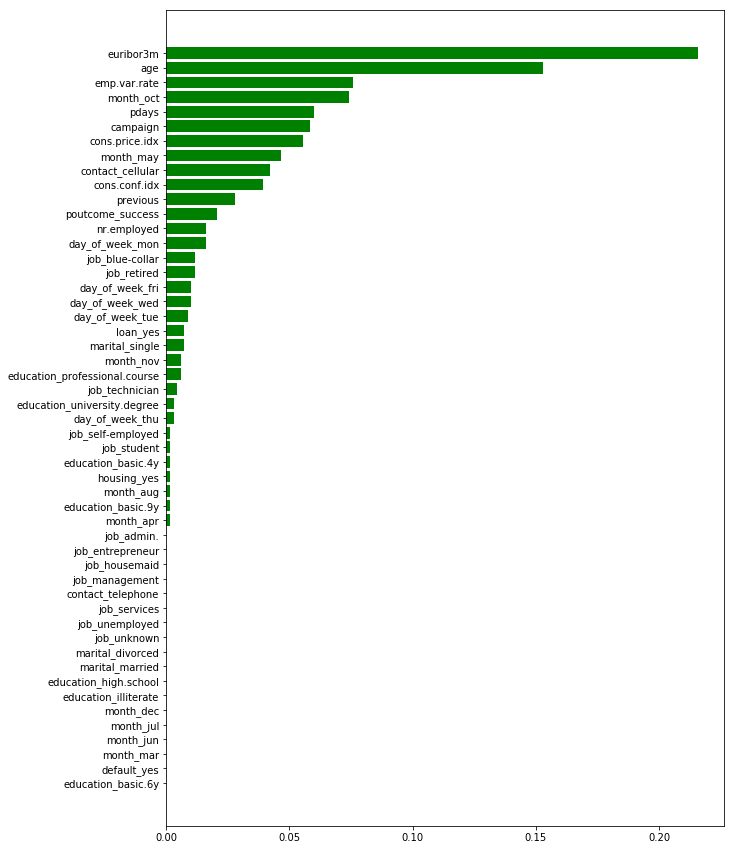

In [107]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()